In [32]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/Adelaaas/Data_science_basic_22-23_1/main/class_work_6/train_var_2.csv')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,57,technician,married,secondary,no,950,yes,no,cellular,9,jul,1272,1,-1,0,unknown,no
1,34,technician,single,tertiary,no,925,yes,no,cellular,13,apr,709,1,-1,0,unknown,yes
2,41,blue-collar,single,secondary,no,75,yes,no,unknown,1,jul,479,9,-1,0,unknown,yes
3,46,technician,single,tertiary,no,4414,no,no,cellular,18,aug,504,7,-1,0,unknown,yes
4,28,unknown,single,secondary,no,4465,no,no,cellular,28,jan,769,1,-1,0,unknown,yes
5,55,technician,married,secondary,no,312,no,no,cellular,6,feb,13,8,9,3,other,no
6,31,admin.,single,secondary,no,690,no,no,cellular,4,may,10,4,87,12,failure,no
7,45,admin.,married,secondary,no,205,no,no,cellular,3,feb,373,1,92,1,success,yes
8,21,student,single,secondary,no,71,no,no,cellular,13,jan,169,2,-1,0,unknown,yes
9,36,services,divorced,secondary,yes,0,no,yes,cellular,15,jul,687,7,-1,0,unknown,yes


1
Не очеь сильны разброс точек

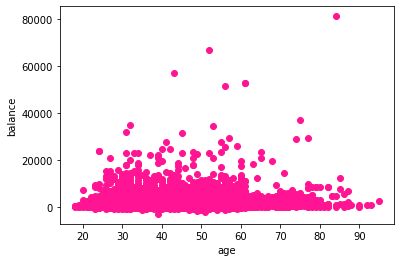

In [60]:
import seaborn as sns
import numpy as np
x = df["age"]
y = df["balance"]

fig, ax = plt.subplots()
ax.scatter(x, y, c = 'deeppink')
plt.xlabel("age") 
plt.ylabel("balance") 
plt.show()




2
Читый датасет(нет пропусков)

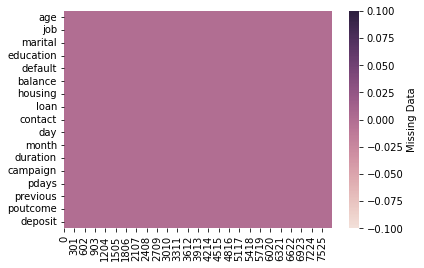

In [58]:
df.isna().sum()
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)

sns.heatmap(df.isna().transpose(), cmap=cmap,
            cbar_kws={'label': 'Missing Data'})



3

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

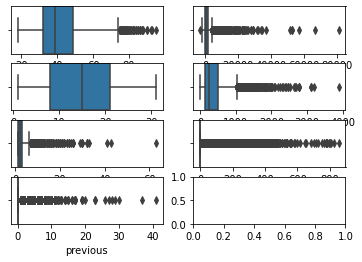

In [61]:
fig, col = plt.subplots(4, 2) 
sns.boxplot(df['age'], ax=col[0][0], width=1)
sns.boxplot(df['balance'], ax=col[0][1], width=1)
sns.boxplot(df['day'], ax=col[1][0], width=1)
sns.boxplot(df['duration'], ax=col[1][1], width=1)
sns.boxplot(df['campaign'], ax=col[2][0], width=1)
sns.boxplot(df['pdays'], ax=col[2][1], width=1)
sns.boxplot(df['previous'], ax=col[3][0], width=1)

4
Да, встречается чаще, чем нет, но не сильно

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


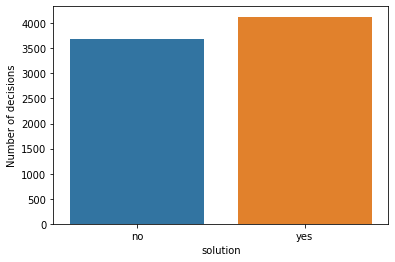

In [56]:
mas = [df[df["deposit"] == 'yes']["deposit"].count(), df[df["deposit"] == 'no']["deposit"].count()]
mas = pd.Series(y)
x= df["deposit"]
sns.barplot(x, mas)

plt.xlabel("solution")  
plt.ylabel("Number of decisions")

plt.show()

5
между собой больше коррелируют pdays и previous.

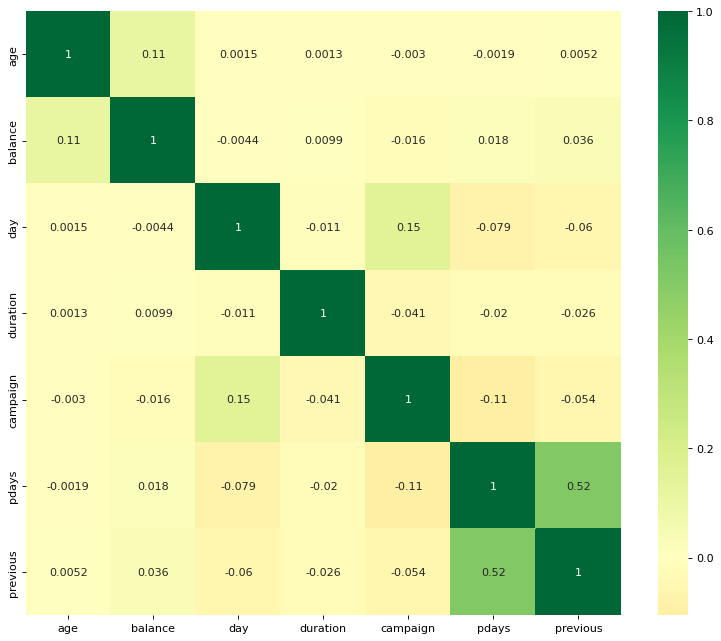

In [65]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.xticks()
plt.yticks()
plt.show()

6


<Figure size 432x288 with 0 Axes>

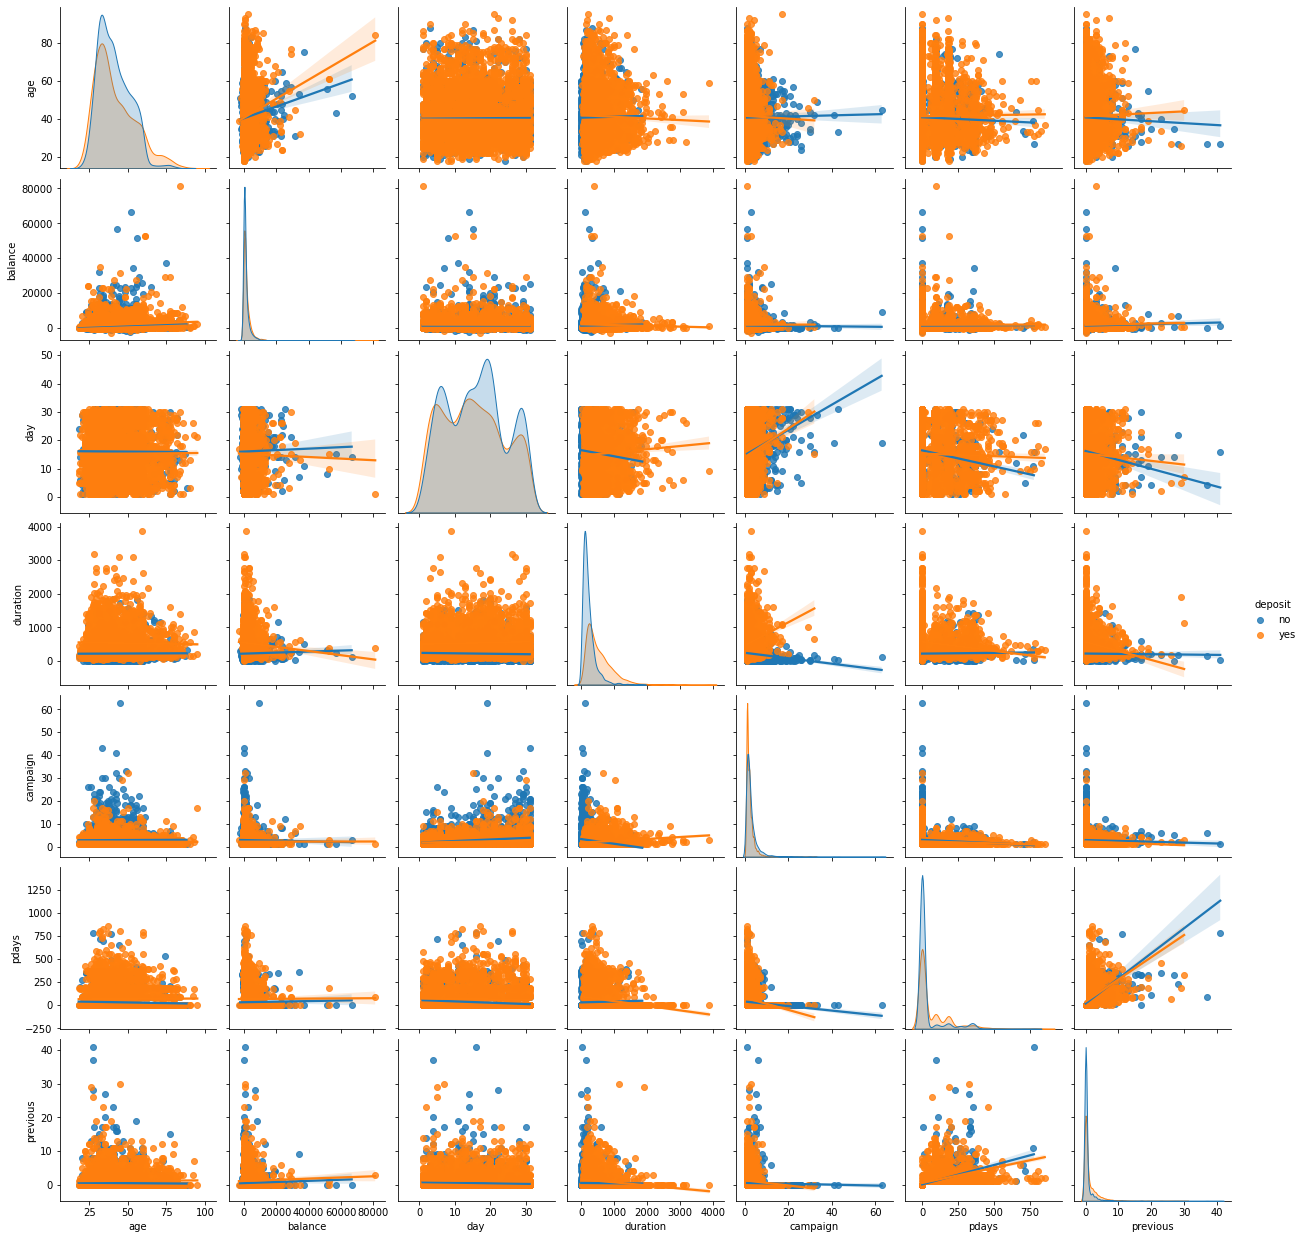

In [66]:
plt.figure()
sns.pairplot(df, kind="reg", hue="deposit")

plt.show()
